<br>

# <center> Support Vector Machine - *Binary Class*


<br>

---

<br>


<br>

## Import Libraries

In [1]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<br>

## Dataset Overview

In [2]:
# loading dataset
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

# Creating dataframe
df = pd.DataFrame(data=breast_cancer['data'], columns=breast_cancer['feature_names'])

# extracting targets
target = breast_cancer['target']

# extracting targets names
targetNames = breast_cancer['target_names']

In [3]:
# dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# checking the target class and their names
print('Target Classes')
print('--------------------')

for index, name in enumerate(targetNames):
  print(f'Class {index} : {name}')

Target Classes
--------------------
Class 0 : malignant
Class 1 : benign


<br>

## Preprocessing

**Train Test Split**

In [6]:
# Train Test Split
X = df.values
y = target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**Scaling Data**

In [7]:
# Scaling Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


<br>

# 01. Model Design

In [8]:
# importing libraries for model design
from sklearn.svm import SVC

In [9]:
# checking the shape of the training data
X_train.shape

(455, 30)

## Creating Model

In [10]:
# model creatiion
model = SVC()

<br>

# 02. Model Training

In [11]:
# model training
model.fit(
    X = X_train,
    y = y_train
)


SVC()

<br>

# 03. Model Evaluaiton

<br>

## a. Classification Report and Confusion Matrix

In [12]:
# prediction on test set
predictions = model.predict(X_test)

In [13]:
predictions = model.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
# classification report
print( classification_report(y_test, predictions) )

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Text(47.040000000000006, 0.5, 'Actual Class')

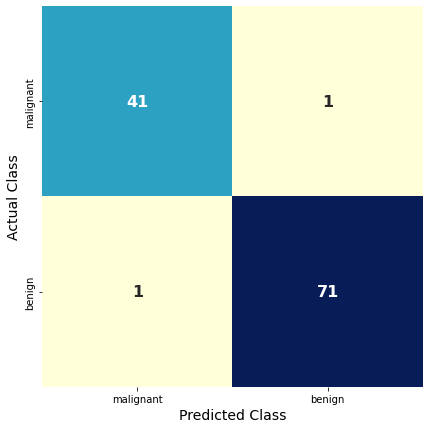

In [16]:
# confusion matrix
confusionMat  = confusion_matrix(y_test, predictions)

# plotting heatmap of confusion matrix
plt.figure(figsize=(7,7))

sns.heatmap(confusionMat, square=True, fmt='d', 
            cbar=False, cmap='YlGnBu',  
            xticklabels=targetNames,
            yticklabels=targetNames,
            annot=True,
            annot_kws={
                "fontsize":16,
                'fontweight': 'bold',
                },
          )

plt.xlabel('Predicted Class', fontsize=14)
plt.ylabel('Actual Class', fontsize=14)

<br>

## b. Prediction on New Data

**Creating data**

In [17]:
# defining data position
pos = 83

# collecting data from dataframe - df
new_data = df.iloc[pos]

# reshaping the data
new_data = new_data.values.reshape(-1, 30)

# scaling the data using scaler()
new_data = scaler.transform( new_data )

# extracting true result
true_result = target[pos]

<br>

**Predicting Class for Created Data**

In [18]:
# predicting result for new_data
predicted_result = model.predict(new_data)

# extracting the predicted class
predicted_result = predicted_result[0]

<br>

**Extracting Class name**

In [19]:
# extracting predicted class name
predicted_class_name = targetNames[predicted_result]

print(f"\n The predicted class is : '{predicted_class_name}'")

# extracting actual class name
true_class_name = targetNames[true_result]

print(f"\n The actual class is : '{true_class_name}'")


 The predicted class is : 'malignant'

 The actual class is : 'malignant'


<br>
<br>

---

<br>

# Save the model


```
# defining the name of the model
modelName = 'model.h5'

# creating the path
path = 'model_directory/' + modelName

# save model
model.save( path )
```



<br>

# Load the model


```
# defining the name of the model
modelName = 'model.h5'

# creating the path
path = 'model_directory/' + modelName

# loading saved models
from tensorflow.keras.models import load_model
model = load_model( path )
```

